In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 


In [22]:
df=pd.read_csv("creditcard.csv")

In [23]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [26]:
df.shape

(284807, 31)

In [27]:
X=df.drop("Class",axis=1)
y=df["Class"]

In [28]:
X.value_counts()

Time      V1          V2          V3         V4         V5         V6         V7          V8          V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount
163152.0  -1.203617    1.574009    2.889277   3.381404   1.538663   3.698747   0.560211   -0.150911    0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727    0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0.855262  1.51      18
          -1.196037    1.585949    2.883976   3.378471   1.511706   3.717077   0.585362   -0.156001    0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294    0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0.858197  7.56      1

In [29]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)


In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)

In [33]:
lr.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [34]:
y_pred_lr=lr.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
Cm=confusion_matrix(y_test,y_pred_lr)
print(Cm)
print(classification_report(y_test,y_pred_lr))
score=accuracy_score(y_test,y_pred_lr)
print(score)

[[69444  1635]
 [   14   109]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202

0.9768405381871296


In [35]:
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], shape=(71202,))

In [36]:
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,1.0,0.1,0.01,1000]
solver=['newton-cg','saga','sag','liblinear','lbfgs']

In [37]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [38]:
from sklearn.model_selection import StratifiedKFold
cv_strkf=StratifiedKFold()

In [39]:
from sklearn.model_selection import GridSearchCV
gridcv=GridSearchCV(estimator=model,param_grid=params,n_jobs=-1,cv=cv_strkf,scoring='accuracy')

In [40]:
gridcv

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 1.0, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'saga', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [41]:
gridcv.fit(X_train_scaled,y_train)

c:\Users\ojass\anaconda3\envs\selfProjenv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ojass\anaconda3\envs\selfProjenv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ojass\anaconda3\envs\selfProjenv\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\ojass\anaconda3\envs\selfProjenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, i

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 1.0, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'saga', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [42]:
gridcv.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [43]:
gridcv.best_score_

np.float64(0.9992462723250861)

In [44]:
y_pred_GCV=gridcv.predict(X_test_scaled)

In [52]:
CmGCV=confusion_matrix(y_test,y_pred_GCV)
print(CmGCV)
print(classification_report(y_test,y_pred_GCV))
scoreGCV=accuracy_score(y_test,y_pred_GCV)
print(scoreGCV)

[[71065    14]
 [   48    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.61      0.71       123

    accuracy                           1.00     71202
   macro avg       0.92      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202

0.9991292379427544


In [53]:
model1=LogisticRegression(max_iter=20000)
penalty=['l1','l2','elasticnet']
c_values=[100,1.0,0.1,0.01,1000]
solver=['newton-cg','saga','sag','liblinear','lbfgs']

In [58]:
params1=dict(penalty=penalty,C=c_values,solver=solver)

In [59]:
from sklearn.model_selection import RandomizedSearchCV
rndSCV=RandomizedSearchCV(param_distributions=params1,scoring='accuracy',cv=5,estimator=model1,n_jobs=-1)

In [60]:
rndSCV

,estimator,LogisticRegre...ax_iter=20000)
,param_distributions,"{'C': [100, 1.0, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'saga', ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [61]:
rndSCV.fit(X_train_scaled,y_train)

c:\Users\ojass\anaconda3\envs\selfProjenv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ojass\anaconda3\envs\selfProjenv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ojass\anaconda3\envs\selfProjenv\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\ojass\anaconda3\envs\selfProjenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in f

,estimator,LogisticRegre...ax_iter=20000)
,param_distributions,"{'C': [100, 1.0, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'saga', ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [62]:
rndSCV.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}

In [63]:
rndSCV.best_score_

np.float64(0.9992369092483792)

In [64]:
y_pred_RSCV=rndSCV.predict(X_test_scaled)

In [69]:
CmRSCV=confusion_matrix(y_test,y_pred_RSCV)
print(CmGCV)
print(classification_report(y_test,y_pred_RSCV))
scoreRSCV=accuracy_score(y_test,y_pred_RSCV)
print(scoreRSCV)

[[71065    14]
 [   48    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.62      0.71       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202

0.9991432824920649


In [67]:
scoreGCV

0.9991292379427544

In [68]:
scoreRSCV

0.9991432824920649

In [70]:
finalLr = LogisticRegression(
    C=0.1,
    penalty='l2',
    solver='lbfgs',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

finalLr.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [71]:
y_pred_FLR=finalLr.predict(X_test_scaled)

In [72]:
CmFLR=confusion_matrix(y_test,y_pred_FLR)
print(CmFLR)
print(classification_report(y_test,y_pred_FLR))
scoreFLR=accuracy_score(y_test,y_pred_FLR)
print(scoreFLR)

[[69455  1624]
 [   14   109]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202

0.9769950282295441


In [73]:
y_prob = finalLr.predict_proba(X_test_scaled)[:, 1]


In [74]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_threshold(threshold):
    y_pred_custom = (y_prob >= threshold).astype(int)
    
    print(f"\nThreshold = {threshold}")
    print(confusion_matrix(y_test, y_pred_custom))
    print(classification_report(y_test, y_pred_custom))


In [75]:
for t in [0.3, 0.4, 0.5, 0.6, 0.7]:
    evaluate_threshold(t)



Threshold = 0.3
[[67343  3736]
 [   12   111]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     71079
           1       0.03      0.90      0.06       123

    accuracy                           0.95     71202
   macro avg       0.51      0.92      0.51     71202
weighted avg       1.00      0.95      0.97     71202


Threshold = 0.4
[[68674  2405]
 [   14   109]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.04      0.89      0.08       123

    accuracy                           0.97     71202
   macro avg       0.52      0.93      0.53     71202
weighted avg       1.00      0.97      0.98     71202


Threshold = 0.5
[[69455  1624]
 [   14   109]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.12       123

    accuracy                          

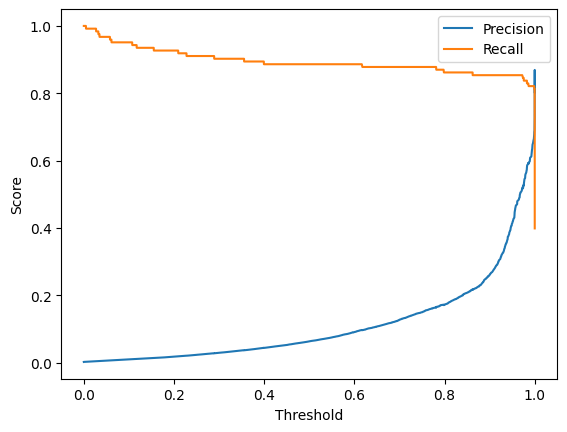

In [76]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()


In [77]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


In [79]:
auc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", auc_score)


ROC-AUC Score: 0.9725043141622907


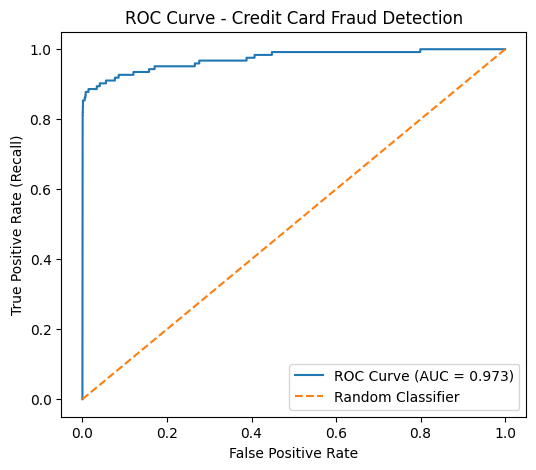

In [80]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Credit Card Fraud Detection")
plt.legend()
plt.show()


In [81]:
normal_txn = [
    10000,        # Time
    -1.35, -0.07, 2.53, 1.37, -0.33, 0.46, 0.23,
    0.09, 0.36, 0.09, -0.55, -0.61, -0.99, -0.31,
    1.46, -0.47, 0.20, 0.02, 0.40, 0.25,
    -0.01, 0.27, -0.11, 0.06, 0.12,
    -0.18, 0.13, -0.02,
    149.62        # Amount
]


In [83]:
finalLr.predict(scaler.transform([normal_txn]))

c:\Users\ojass\anaconda3\envs\selfProjenv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [88]:
fraud_txn = [
    20000,        # Time
    -4.18, 2.41, -1.85, 0.73, -1.20, -3.22, 1.45,
    -2.18, -1.03, 2.90, -2.89, 1.45, -0.47, -4.38,
    -0.12, -1.12, -2.22, -0.45, -1.99, 0.88,
    -1.12, -0.66, -0.43, -1.11, -0.72,
    0.52, -1.90, -0.28,
    2.50          # Amount (small amount, fraud me common)
]


In [89]:
finalLr.predict(scaler.transform([fraud_txn]))

c:\Users\ojass\anaconda3\envs\selfProjenv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])